# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Practice

## Objectives
You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

# Rename all the columns to lower case

In [9]:
df = df.rename(columns = str.lower)
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Change the Index to be the Line Names

In [10]:
df = df.set_index('linename')
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Painstakingly change the index back

In [11]:
#df['linename'] = df.index
#df.head()
df = df.reset_index()
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [15]:
df['Num_Lines'] = df.linename.map(lambda x: len(x))
df.sort_values(by='Num_Lines', ascending=False)

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
132292,1237ACENQRSW,R151,R033,00-00-00,TIMES SQ-42 ST,IRT,08/30/2018,00:00:00,REGULAR,1417952,3267016,12
2686,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/29/2018,16:00:00,REGULAR,2836145,3311412,12
2673,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,16:00:00,REGULAR,2830710,3305818,12
2674,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,20:00:00,REGULAR,2832048,3306310,12
2675,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,00:00:00,REGULAR,2832325,3306433,12
2676,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,04:00:00,REGULAR,2832359,3306438,12
2677,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,08:00:00,REGULAR,2832561,3306716,12
2678,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,09:57:08,REGULAR,2832815,3307705,12
2679,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,12:00:00,REGULAR,2832994,3308064,12
2680,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,16:00:00,REGULAR,2833390,3308536,12


## Write a function to clean a column name.

In [16]:
def clean(col_name):
    cleaned = col_name.strip() #Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

In [17]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [18]:
#Checking the output, we can see the results.
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'Num_Lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

In [27]:
df.date = pd.to_datetime(df.date, format='%m/%d/%Y')
df['day_of_week'] = df.date.dt.dayofweek


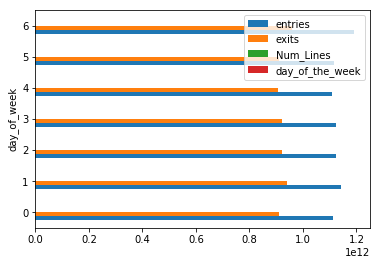

In [28]:
grouped = df.groupby('day_of_week').sum()
grouped.plot(kind='barh')

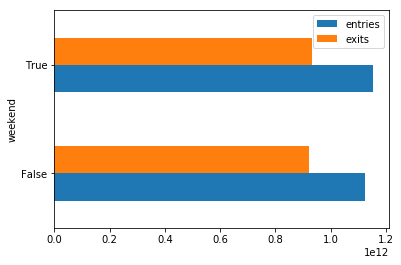

In [30]:
grouped = grouped.reset_index()
grouped['weekend'] = grouped.day_of_week.map({0:False,1:False,2:False,3:False,4:False,5:True,6:True})
weekend = grouped.groupby('weekend').mean()
weekend[['entries', 'exits']].plot(kind='barh')

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

In [ ]:
#Your code here

# Drop a couple of columns

In [ ]:
df = df.drop('scp', axis=1)
df = df.drop('divison', axis = 1)